In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow as tf

train = pd.read_csv("../../scene-classification/train.csv")

W0820 10:22:20.549795 140053229438784 __init__.py:689] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [11]:
from keras.preprocessing import image

train_image = []
for i in range(train.shape[0]):
    print(train['image_name'][i])
    img = image.load_img('../../scene-classification/train/'+train['image_name'][i], target_size=(150,150,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)



0.jpg
1.jpg
2.jpg
4.jpg
7.jpg
8.jpg
9.jpg
10.jpg
12.jpg
13.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
20.jpg
21.jpg
23.jpg
24.jpg
26.jpg
27.jpg
29.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
39.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
50.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
60.jpg
62.jpg
65.jpg
66.jpg
67.jpg
68.jpg
71.jpg
74.jpg
75.jpg
78.jpg
80.jpg
82.jpg
83.jpg
85.jpg
86.jpg
87.jpg
89.jpg
90.jpg
91.jpg
92.jpg
94.jpg
95.jpg
96.jpg
97.jpg
98.jpg
100.jpg
102.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
118.jpg
120.jpg
122.jpg
123.jpg
124.jpg
125.jpg
128.jpg
131.jpg
134.jpg
136.jpg
137.jpg
138.jpg
139.jpg
142.jpg
146.jpg
147.jpg
148.jpg
150.jpg
151.jpg
153.jpg
154.jpg
155.jpg
157.jpg
158.jpg
159.jpg
160.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
170.jpg
174.jpg
175.jpg
177.jpg
178.jpg
180.jpg
181.jpg
184.jpg
186.jpg
187.jpg
188.jpg
189.jpg
190.jpg
191.jpg
192.jpg


In [13]:
from keras.utils import to_categorical
y=train['label'].values
y = to_categorical(y)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# print shape of training set
print('x_train shape:', x_train.shape)
# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (10901, 150, 150, 3)
10901 train samples
3407 test samples
2726 validation samples


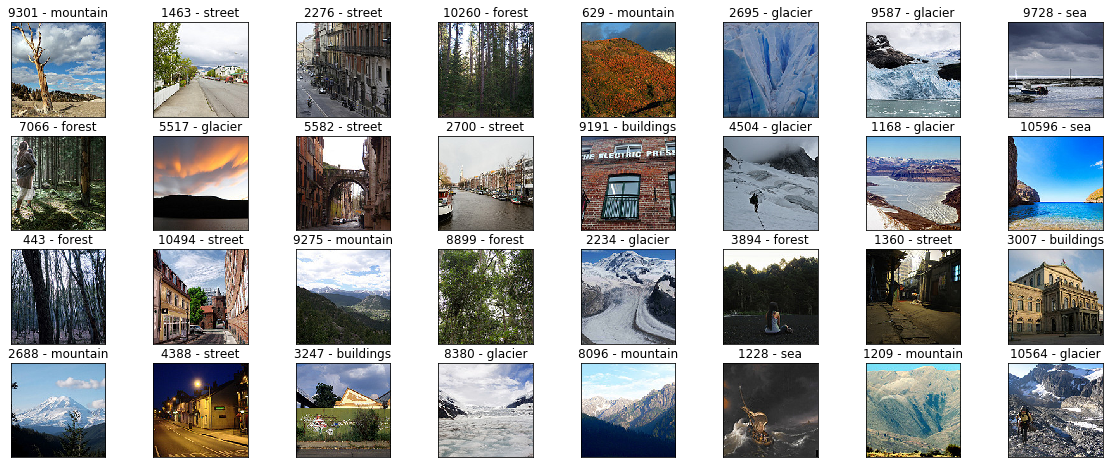

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_train.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[idx]))
    label_idx = np.argmax(y_train[idx])
    ax.set_title("{} - {}".format(idx, classification_labels[label_idx]))

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 16)      208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               21904500  
__________

In [29]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Traiin the model

In [43]:
from keras.callbacks import ModelCheckpoint   

# train the model
# checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid), verbose=2, shuffle=True)


Train on 10901 samples, validate on 2726 samples
Epoch 1/20
 - 168s - loss: 0.4617 - acc: 0.8417 - val_loss: 0.8636 - val_acc: 0.7285
Epoch 2/20
 - 168s - loss: 0.3217 - acc: 0.8944 - val_loss: 0.9749 - val_acc: 0.7285
Epoch 3/20
 - 168s - loss: 0.2403 - acc: 0.9240 - val_loss: 1.1007 - val_acc: 0.7223
Epoch 4/20
 - 168s - loss: 0.1912 - acc: 0.9417 - val_loss: 1.4634 - val_acc: 0.7113
Epoch 5/20
 - 168s - loss: 0.1359 - acc: 0.9610 - val_loss: 1.5307 - val_acc: 0.7245
Epoch 6/20
 - 168s - loss: 0.1410 - acc: 0.9616 - val_loss: 1.4271 - val_acc: 0.7340
Epoch 7/20
 - 168s - loss: 0.1456 - acc: 0.9661 - val_loss: 1.5779 - val_acc: 0.7161
Epoch 8/20
 - 168s - loss: 0.1188 - acc: 0.9714 - val_loss: 2.3104 - val_acc: 0.7062
Epoch 9/20
 - 168s - loss: 0.1291 - acc: 0.9703 - val_loss: 3.2646 - val_acc: 0.6049
Epoch 10/20
 - 168s - loss: 0.1267 - acc: 0.9694 - val_loss: 2.2593 - val_acc: 0.7080
Epoch 11/20
 - 168s - loss: 0.1317 - acc: 0.9726 - val_loss: 3.5322 - val_acc: 0.6566
Epoch 12/20
 -

### Load the Model with the Best Validation Accuracy

In [32]:
# load the weights that yielded the best validation accuracy
# model.load_weights('model.weights.best.hdf5')

### Calculate Classification Accuracy on Test Set

In [33]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7464044614554781


In [34]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
classification_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

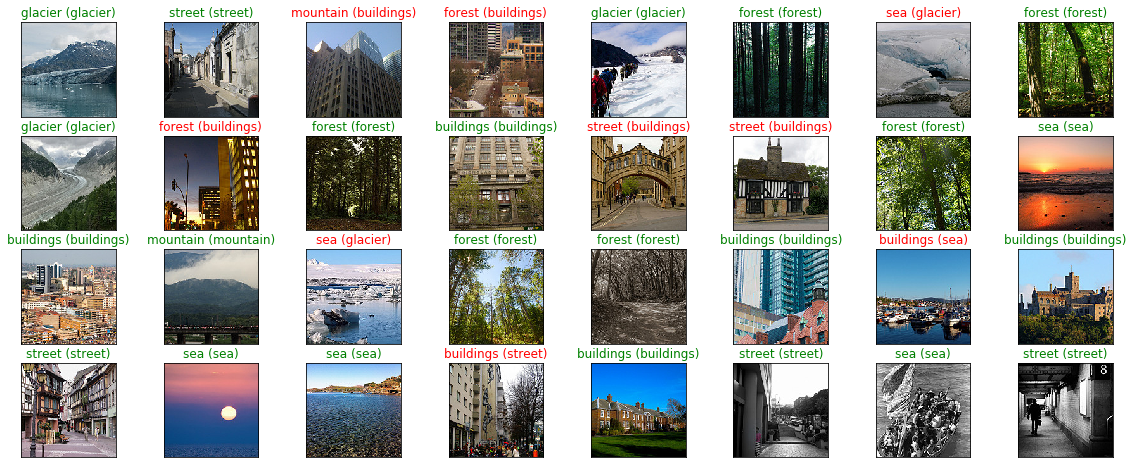

In [35]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(classification_labels[pred_idx], classification_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

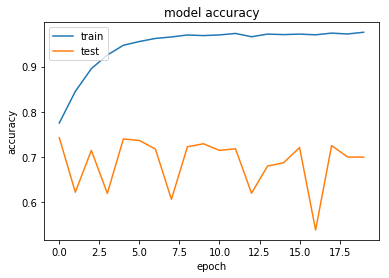

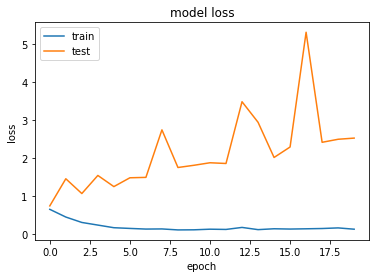

In [36]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()